 2 Распределения

Вопрос 1. Какие из приведенных величин, скорее всего, можно моделировать с помощью распределения Пуассона?
(a) Результат выпадения симметричного шестигранного кубика.
(b) Количество людей в очереди на кассу в супермаркете. 
(c) Количество изюма в булочках с изюмом.
(d) Число попаданий в баскетбольное кольцо за n попыток. 
(e) Точное время прихода на работу.

* Ответ: (с), (b), (d?)

Вопрос 2. Постройте графики плотностей и функций распределения для: (a) Распределения Пуассона
(b) Экспоненциального распределения (sts.expon)
(c) Любого на выбор, которое не проходили
Для каждого распределения поэкспериментируйте с выбором параметров и изобразите их на одном графике, не забывая про легенду и подписи осей.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [4]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/maxim/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/maxim/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/maxim/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


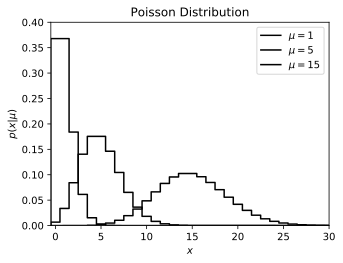

In [13]:
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']
fig, ax = plt.subplots(figsize=(5, 3.75))

for mu, ls in zip(mu_values, linestyles):
    # create a poisson distribution
    # we could generate a random sample from this distribution using, e.g.
    #   rand = dist.rvs(1000)
    dist = poisson(mu)
    x = np.arange(-1, 200)

    plt.plot(x, dist.pmf(x), ls=ls, color='black',
             label=r'$\mu=%i$' % mu, linestyle='steps-mid')

plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
#plt.show()

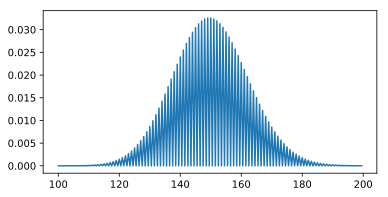

In [9]:
x= np.arange(100,200,0.5)
plt.plot(x, poisson.pmf(x,150))

plt.show()

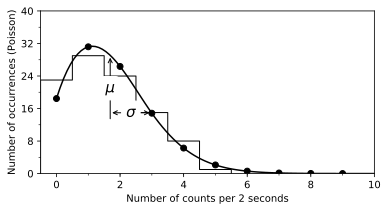

In [14]:
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
from scipy import interpolate

def simulate_poisson():
    # Mean is 1.69
    mu = 1.69
    sigma = sp.sqrt(mu)
    mu_plus_sigma = mu + sigma

    # Draw random samples from the Poisson distribution, to simulate
    # the observed events per 2 second interval.
    counts = stats.poisson.rvs(mu, size=100)

    # Bins for the histogram: only the last bin is closed on both
    # sides. We need one more bin than the maximum value of count, so
    # that the maximum value goes in its own bin instead of getting
    # added to the previous bin.
    # [0,1), [1, 2), ..., [max(counts), max(counts)+1]
    bins = range(0, max(counts)+2)

    # Plot histogram.
    plt.hist(counts, bins=bins, align="left", histtype="step", color="black")

    # Create Poisson distribution for given mu.
    x = range(0,10)
    prob = stats.poisson.pmf(x, mu)*100 

    # Plot the PMF.
    plt.plot(x, prob, "o", color="black")

    # Draw a smooth curve through the PMF.
    l = sp.linspace(0,11,100)
    s = interpolate.spline(x, prob, l)
    plt.plot(l,s,color="black")

    plt.xlabel("Number of counts per 2 seconds")
    plt.ylabel("Number of occurrences (Poisson)")

    # Interpolated probability at x = μ + σ; for marking σ in the graph.
    xx = sp.searchsorted(l,mu_plus_sigma) - 1
    v = ((s[xx+1] -  s[xx])/(l[xx+1]-l[xx])) * (mu_plus_sigma - l[xx])
    v += s[xx]

    ax = plt.gca()
    # Reset axis range and ticks.
    ax.axis([-0.5,10, 0, 40])
    ax.set_xticks(range(1,10), minor=True)
    ax.set_yticks(range(0,41,8))
    ax.set_yticks(range(4,41,8), minor=True)

    # Draw arrow and then place an opaque box with μ in it.
    ax.annotate("", xy=(mu,29), xycoords="data", xytext=(mu, 13),
                textcoords="data", arrowprops=dict(arrowstyle="->",
                                                   connectionstyle="arc3"))
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    ax.text(mu, 21, r"$\mu$", va="center", ha="center",
            size=15, bbox=bbox_props)

    # Draw arrow and then place an opaque box with σ in it.
    ax.annotate("", xy=(mu,v), xytext=(mu_plus_sigma,v),
                arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
    bbox_props = dict(boxstyle="round", fc="w", ec="w")
    ax.text(mu+(sigma/2.0), v, r"$\sigma$", va="center", ha="center",
            size=15, bbox=bbox_props)

    # Refresh plot and save figure.
    plt.draw()
    plt.savefig("simulate_poisson.png")

simulate_poisson()